In [87]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pickle
import re

import keras

## Open and preprocess text

In [222]:
with open("data/moliere_1_clean.txt") as f1:
    moliere_1 = f1.read()
with open("data/moliere_2_clean.txt") as f2:
    moliere_2 = f2.read()
with open("data/moliere_3_clean.txt") as f3:
    moliere_3 = f3.read()

In [223]:
text = moliere_1 #+ ' ' + moliere_2 + ' ' + moliere_3
len(text)

412476

### Remove special characters

In [246]:
text = text.replace('œ','oe')
text = text.replace('æ','ae')
text = text.replace('î','i')
text = text.replace('ï','i')
text = text.replace('º','')
text = text.replace('_','')
text = text.replace('ñ','n')
text = text.replace('λ','')
text = text.replace('ο','')
text = text.replace('ρ','')
text = text.replace('ς','')
text = text.replace('φ','')
text = text.replace('β','')
text = text.replace('ε','')
text = text.replace('ι','')

text = text.replace('\n',' ')

text = re.sub(r'( )+',' ',text) #remove multiple spaces

text[:100]

'Eh bien, Sabine, quel conseil me donnes-tu? Vraiment, il y a bien des nouvelles. Mon oncle veut réso'

In [247]:
character_list = sorted(set(text))
N_char = len(character_list)

print('Length of vocab:',N_char)
print(character_list)

Length of vocab: 87
[' ', '!', "'", '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '«', '»', 'Ç', 'É', 'Ê', 'à', 'â', 'ç', 'è', 'é', 'ê', 'ë', 'ô', 'ù', 'û']


### Tokenize text

In [248]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(text)

In [249]:
max([len(sent) for sent in sentences])

1234

### Encode characters

In [324]:
char2code = {}
for k, word in enumerate(character_list):
    char2code[word] = k
    
print(char2code)

{' ': 0, '!': 1, "'": 2, '(': 3, ')': 4, ',': 5, '-': 6, '.': 7, '0': 8, '1': 9, '2': 10, '3': 11, '4': 12, '5': 13, '6': 14, '7': 15, '8': 16, '9': 17, ':': 18, ';': 19, '?': 20, 'A': 21, 'B': 22, 'C': 23, 'D': 24, 'E': 25, 'F': 26, 'G': 27, 'H': 28, 'I': 29, 'J': 30, 'K': 31, 'L': 32, 'M': 33, 'N': 34, 'O': 35, 'P': 36, 'Q': 37, 'R': 38, 'S': 39, 'T': 40, 'U': 41, 'V': 42, 'X': 43, 'Y': 44, 'Z': 45, 'a': 46, 'b': 47, 'c': 48, 'd': 49, 'e': 50, 'f': 51, 'g': 52, 'h': 53, 'i': 54, 'j': 55, 'k': 56, 'l': 57, 'm': 58, 'n': 59, 'o': 60, 'p': 61, 'q': 62, 'r': 63, 's': 64, 't': 65, 'u': 66, 'v': 67, 'w': 68, 'x': 69, 'y': 70, 'z': 71, '«': 72, '»': 73, 'Ç': 74, 'É': 75, 'Ê': 76, 'à': 77, 'â': 78, 'ç': 79, 'è': 80, 'é': 81, 'ê': 82, 'ë': 83, 'ô': 84, 'ù': 85, 'û': 86}


In [325]:
code2char = {v:k for k,v in char2code.items()}
print(code2char)

{0: ' ', 1: '!', 2: "'", 3: '(', 4: ')', 5: ',', 6: '-', 7: '.', 8: '0', 9: '1', 10: '2', 11: '3', 12: '4', 13: '5', 14: '6', 15: '7', 16: '8', 17: '9', 18: ':', 19: ';', 20: '?', 21: 'A', 22: 'B', 23: 'C', 24: 'D', 25: 'E', 26: 'F', 27: 'G', 28: 'H', 29: 'I', 30: 'J', 31: 'K', 32: 'L', 33: 'M', 34: 'N', 35: 'O', 36: 'P', 37: 'Q', 38: 'R', 39: 'S', 40: 'T', 41: 'U', 42: 'V', 43: 'X', 44: 'Y', 45: 'Z', 46: 'a', 47: 'b', 48: 'c', 49: 'd', 50: 'e', 51: 'f', 52: 'g', 53: 'h', 54: 'i', 55: 'j', 56: 'k', 57: 'l', 58: 'm', 59: 'n', 60: 'o', 61: 'p', 62: 'q', 63: 'r', 64: 's', 65: 't', 66: 'u', 67: 'v', 68: 'w', 69: 'x', 70: 'y', 71: 'z', 72: '«', 73: '»', 74: 'Ç', 75: 'É', 76: 'Ê', 77: 'à', 78: 'â', 79: 'ç', 80: 'è', 81: 'é', 82: 'ê', 83: 'ë', 84: 'ô', 85: 'ù', 86: 'û'}


In [403]:
def encode(seq):
    if not isinstance(seq,str):
        seq = str(seq)
    return [char2code[ch] for ch in list(seq)]

In [396]:
def decode(encoded):
    if not isinstance(encoded,list):
        encoded = [encoded] 
    return ''.join([code2char[e] for e in encoded]).strip()

### One-hot encoding

In [278]:
def one_hots(numerical_list, vocab_size=N_char):
    result = np.zeros((len(numerical_list), vocab_size))
    for i, idx in enumerate(numerical_list):
        result[i, idx] = 1.0
    return result

In [279]:
def textify(embedding,character_list = character_list):
    result = ""
    indices = np.argmax(embedding, axis=1)
    for idx in indices:
        result += character_list[int(idx)]
    return result

### Prepare dataset

In [345]:
raw = one_hots(encode(text))
raw.shape

(412249, 87)

In [346]:
window_size = 32
step = 4
x,y = [], []

for k in range(window_size,L):
    x.append(raw[k-window_size:k,:])
    y.append(raw[k,:])

In [435]:
X = np.array(x)
Y = np.array(y)
print(X.shape,Y.shape)

(412217, 32, 87) (412217, 87)


In [446]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,train_size=0.7,shuffle=False)
print(Xtrain.shape,Xtest.shape)

(288551, 32, 87) (123666, 32, 87)


## Keras model

### Helper functions

In [416]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(encode(preds)).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)

    return decode(np.argmax(probas))

In [417]:
def multi_sample(preds,n=10,temperature=1.0):
    result = []
    for _ in range(n):
        this = sample(preds,temperature)
        result.append(this)
        preds+=this
    return result

In [418]:
def predict_following(preds,n=10,temperature=1.0):
    return preds + ''.join(multi_sample(preds,n,temperature))

### Core model

In [198]:
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, GRU#, Embedding

from sklearn.metrics import mean_squared_error

keras.layers.GRU(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False, reset_after=False)

Input shape: 3D tensor with shape (batch_size, timesteps, input_dim)

In [510]:
model = Sequential()
#model.add(Embedding(N_features,32))
model.add(GRU(128,input_shape=(window_size,N_char)))
model.add(Dense(N_char,activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_35 (GRU)                 (None, 128)               82944     
_________________________________________________________________
dense_29 (Dense)             (None, 87)                11223     
Total params: 94,167
Trainable params: 94,167
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(Xtrain, Ytrain, batch_size=64, epochs=50, validation_data=(Xtest,Ytest))

Train on 288551 samples, validate on 123666 samples
Epoch 1/50
288551/288551 [==============================] - 226s 783us/step - loss: 1.9281 - acc: 0.4389 - val_loss: 1.8662 - val_acc: 0.4465
Epoch 2/50
288551/288551 [==============================] - 216s 748us/step - loss: 1.8007 - acc: 0.4729 - val_loss: 1.8103 - val_acc: 0.4685
Epoch 3/50
288551/288551 [==============================] - 215s 746us/step - loss: 1.8076 - acc: 0.4707 - val_loss: 1.8637 - val_acc: 0.4539
Epoch 4/50
146560/288551 [==============>...............] - ETA: 1:00:41 - loss: 1.7925 - acc: 0.4735

### Test and visualization

In [458]:
for temp in [0.5,1,2,5]:
    print(predict_following('bonjo',temperature=temp))

bonjo!'''!!'
bonjo)!((('0(
bonjo(!''),!(1
bonjo(',!(.))4!


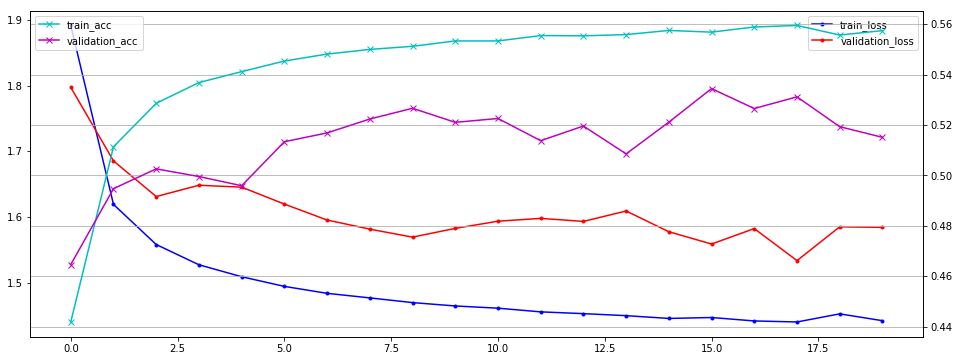

In [506]:
import matplotlib.pyplot as plt
%matplotlib inline

#plt.figure(figsize=(24, 8), dpi= 600);
fig, ax1 = plt.subplots(figsize=(16, 6));
#plt.xscale('log')
#plt.yscale('log')
ax1.plot(history.history['loss'],'b.-')
ax1.plot(history.history['val_loss'],'r.-')
ax2=ax1.twinx();
ax2.plot(history.history['acc'],'cx-');
ax2.plot(history.history['val_acc'],'mx-');

plt.grid();
ax1.legend(['train_loss','validation_loss']);
ax2.legend(['train_acc','validation_acc']);